In [15]:
# 📘 01_eda.ipynb – Exploratory Data Analysis

In [16]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# === Load Data ===
games = pd.read_csv("../DATA/games.csv")
turns = pd.read_csv("../DATA/turns.csv")

# === Quick Overview ===
print("Games:")
display(games.head())
print(games.info())
print(games.describe())

print("\nTurns:")
display(turns.head())
print(turns.info())
print(turns.describe())

Games:


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB
None
            game_id        winner  initial_time_seconds  increment_seconds  \
count  72773.00000

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB
None
            game_id   turn_number        points         score
count  2.005498e+06  2.005498e+06  2.005498e+06  2.005498e+06
mean   3.640032e+04  1.453798e+01  2.900326e+01  2.270914e+02
std    2.100559e+04  8.434285e+00  2.210145e+01  1.343110e+02
min    1.000000e+00  1.000000e+00 -2.210000e+02 -6.400000e+01
25%    1.820800e+04  7.000000e+00  1.600000e+01  1.130000e+02
50%    3.640100e+04  1.400000e+01  2.400000e+01  2.240000e+02
75%    5.460900e+04  2.100000e+01  3.600000e+01  3.320000e+02
max    7.277300e+04  7.500000e+01  3.110000e+02  1.171000e+0

In [18]:
# === Missing Data Check ===
print("Missing values in games:")
print(games.isnull().sum())

print("\nMissing values in turns:")
print(turns.isnull().sum())

# === Column Types ===
print("\nGames dtypes:")
print(games.dtypes)

print("\nTurns dtypes:")
print(turns.dtypes)

Missing values in games:
game_id                  0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64

Missing values in turns:
game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64

Games dtypes:
game_id                    int64
first                     object
time_control_name         object
game_end_reason           object
winner                     int64
created_at                object
lexicon                   object
initial_time_seconds       int64
increment_seconds          int64
rating_mode               object
max_overtime_minutes       int64
game_duration_seconds  

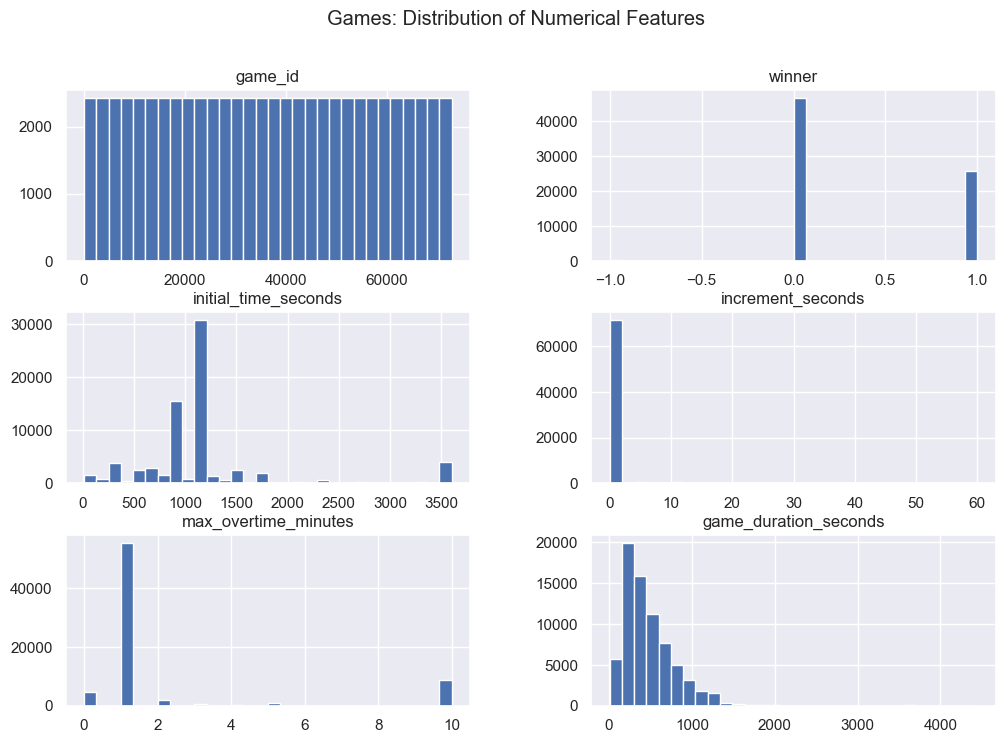


Value counts for first:
 first
STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
pandorable        880
marvin            647
Goldenlamb        547
Eloquent          518
hulkbuster        333
Name: count, dtype: int64

Value counts for time_control_name:
 time_control_name
regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: count, dtype: int64

Value counts for game_end_reason:
 game_end_reason
STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: count, dtype: int64

Value counts for created_at:
 created_at
2022-09-20 15:59:19    3
2022-09-09 14:37:13    3
2022-09-03 14:40:13    2
2022-08-14 00:00:57    2
2022-08-29 03:19:05    2
2022-09-18 02:06:43    2
2022-09-06 08:52:49    2
2022-09-08 09:28:02    2
2022-09-21 18:06:26    2
2022-09-14 19:53:42    2
Name: count, dtype: int64

Value counts for lexicon:
 lexicon
CSW21     44594


In [21]:
# === Univariate Analysis ===
# Histograms of numerical features
games.hist(bins=30, figsize=(12, 8))
plt.suptitle("Games: Distribution of Numerical Features")
plt.show()

# Value counts for categorical features
for col in games.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", games[col].value_counts().head(10))

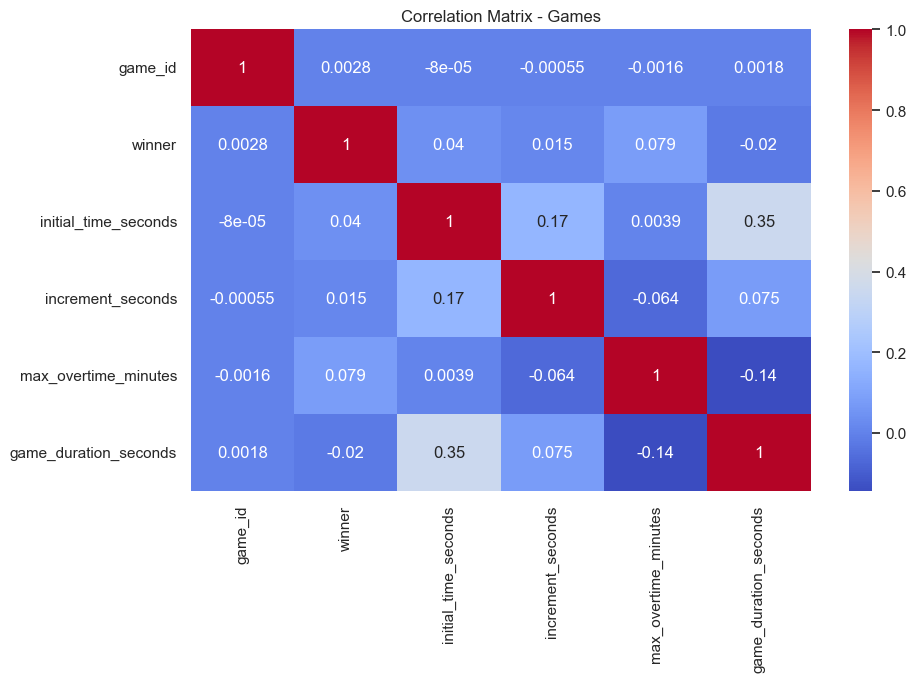

In [26]:
# === Correlation ===
# Keep only numerical columns
numeric_cols = games.select_dtypes(include='number')

# Now compute the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Games")
plt.show()